In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benpostell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benpostell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

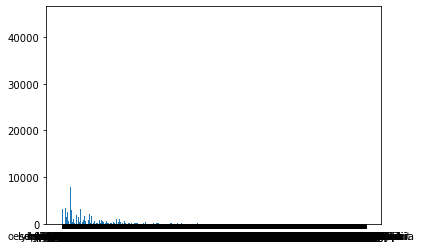

[('pain', 44343), ('test', 38191), ('blood', 34555), ('normal', 27484), ('covid-19', 27113), ('abnorm', 24009), ('fatigu', 17768), ('decreas', 17395), ('increas', 16767), ('headach', 15314)]


<BarContainer object of 10 artists>

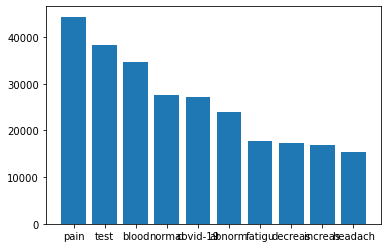

In [4]:
# Load the dataframe
df = pd.read_csv("JustSymptoms1.csv")

# Tokenize the text data
df['Symptoms'] = df['Symptoms'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Symptoms'] = df['Symptoms'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Stem the words
stemmer = SnowballStemmer("english")
df['Symptoms'] = df['Symptoms'].apply(lambda x: [stemmer.stem(word) for word in x])

# Count the frequency of each symptom
symptoms_count = Counter(symptom for symptom_list in df['Symptoms'] for symptom in symptom_list)

# Visualize the results
plt.bar(symptoms_count.keys(), symptoms_count.values())
plt.show()

# Print the most frequent symptoms
print(symptoms_count.most_common(10))

x = [item[0] for item in symptoms_count.most_common(10)]
y = [item[1] for item in symptoms_count.most_common(10)]

plt.bar(x, y)

In [5]:
df2 = pd.read_csv("MonthlyCases.csv")

In [6]:
df2.head(5)

,VAX_TYPE,MonthlyCases,Month
0,COVID19,39242,1
1,COVID19,33754,2
2,COVID19,23375,3
3,COVID19,16825,4
4,COVID19,21287,5


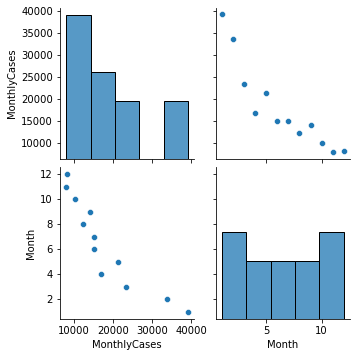

In [7]:
import seaborn as sb
sb.pairplot(df2)

<AxesSubplot:xlabel='Month'>

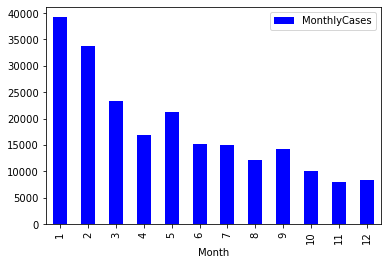

In [27]:
ax = plt.gca()
# df2.plot(kind='line',x='Month',y='MonthlyCases',ax=ax)
df2.plot(kind='bar',x='Month',y='MonthlyCases', color='blue', ax=ax)
#df2.plot(kind='scatter',x='Month',y='MonthlyCases',color='green',ax=ax)

<AxesSubplot:>

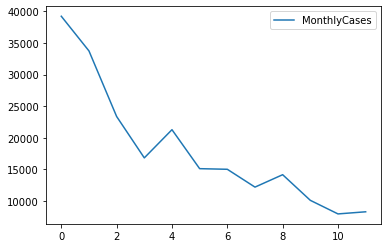

In [9]:
df2.plot(y='MonthlyCases')

<AxesSubplot:title={'center':'Cases Per Month'}, ylabel='Cases'>

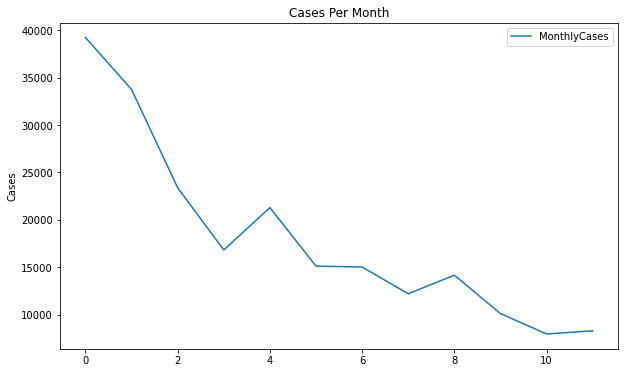

In [10]:
df2.plot(y='MonthlyCases', figsize=(10,6), title='Cases Per Month', ylabel='Cases')

In [30]:
df3 = pd.read_csv("AgeCovid.csv")

In [31]:
df3.head(5)

,Age,COVID19
0,0.08,77
1,0.17,400
2,0.25,90
3,0.33,408
4,0.42,101


In [13]:
df4 = pd.read_csv("GenderCorrelation.csv")

In [17]:
df4.head(5)

,AgeGroup,Male,Female,Total
0,Adult,15664,26385,42049
1,Middle_age,36317,62001,98318
2,Old,21490,26776,48266
3,Young,8879,9558,18437


<AxesSubplot:xlabel='AgeGroup', ylabel='Female'>

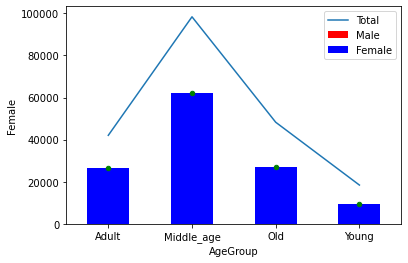

In [14]:
ax = plt.gca()
df4.plot(kind='line',x='AgeGroup',y='Total',ax=ax)
df4.plot(kind='bar',x='AgeGroup',y='Male', color='red', ax=ax)
df4.plot(kind='bar',x='AgeGroup',y='Female', color='blue', ax=ax)
df4.plot(kind='scatter',x='AgeGroup',y='Female',color='green',ax=ax)

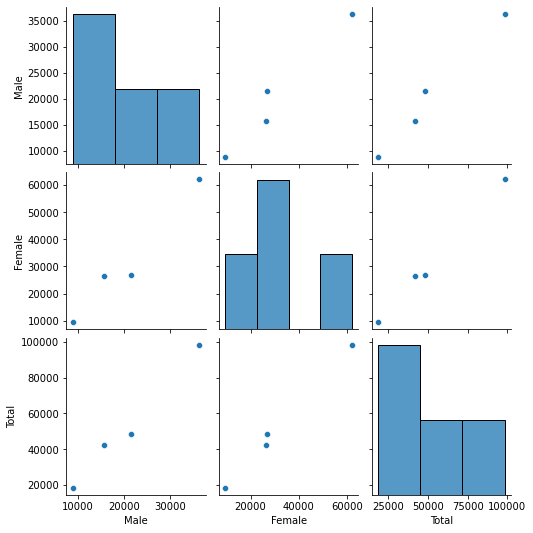

In [15]:
sb.pairplot(df4)